# Feature Selection

### The purpose of this notebook is not to select the final variables that will be included during the modelling section. For now we just want to know what feature selection method is the most adequate and to have an idea of the number of variables that can get selected.

### In the modelling section each store-product combination will have its own feature selection process (completely automated).

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

c:\Users\Luis\miniconda3\envs\retail\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load the data

In [3]:
df = pd.read_pickle("../data/df_feature_engineering.pickle")
df

,date,store_id,item_id,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,...,sales_mvgmax_6,sales_mvgmax_7,sales_mvgmax_8,sales_mvgmax_9,sales_mvgmax_10,sales_mvgmax_11,sales_mvgmax_12,sales_mvgmax_13,sales_mvgmax_14,sales_mvgmax_15
0,2013-01-16,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,2013-01-17,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,2013-01-18,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,2013-01-19,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,2013-01-20,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0
20976,2015-11-27,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,2015-11-28,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,2015-11-29,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


## Supervised methods

#### Separate x and y

In [4]:
target = "sales"
x = df.drop(columns=["sales","date","store_id","item_id"]).copy()
y = df[target].copy()

### Mutual information

#### Create a function to plot the output ranking

In [35]:
def ranking_mi(mutual_selector, mode="table"):
    '''''
    Function that computes the feature importance of each variable of the
    dataset x, creates a dataframe with the ordered ranking from more to less
    important and returns either the dataframe or a plot of the dataframe.
    '''''
    ranking_mi = pd.DataFrame(mutual_selector, index=x.columns).reset_index()
    ranking_mi.columns = ["variable", "importance_mi"]
    ranking_mi = ranking_mi.sort_values(by="importance_mi", ascending=False)
    ranking_mi["ranking_mi"] = np.arange(0, ranking_mi.shape[0])

    if mode=="table":
        return ranking_mi
    else:
        g = ranking_mi["importance_mi"].sort_values().plot(kind="barh", figsize=(12,20))
        g.set_yticklabels(ranking_mi.sort_values(by="importance_mi")["variable"])
    return g
    

#### Plot the ranking

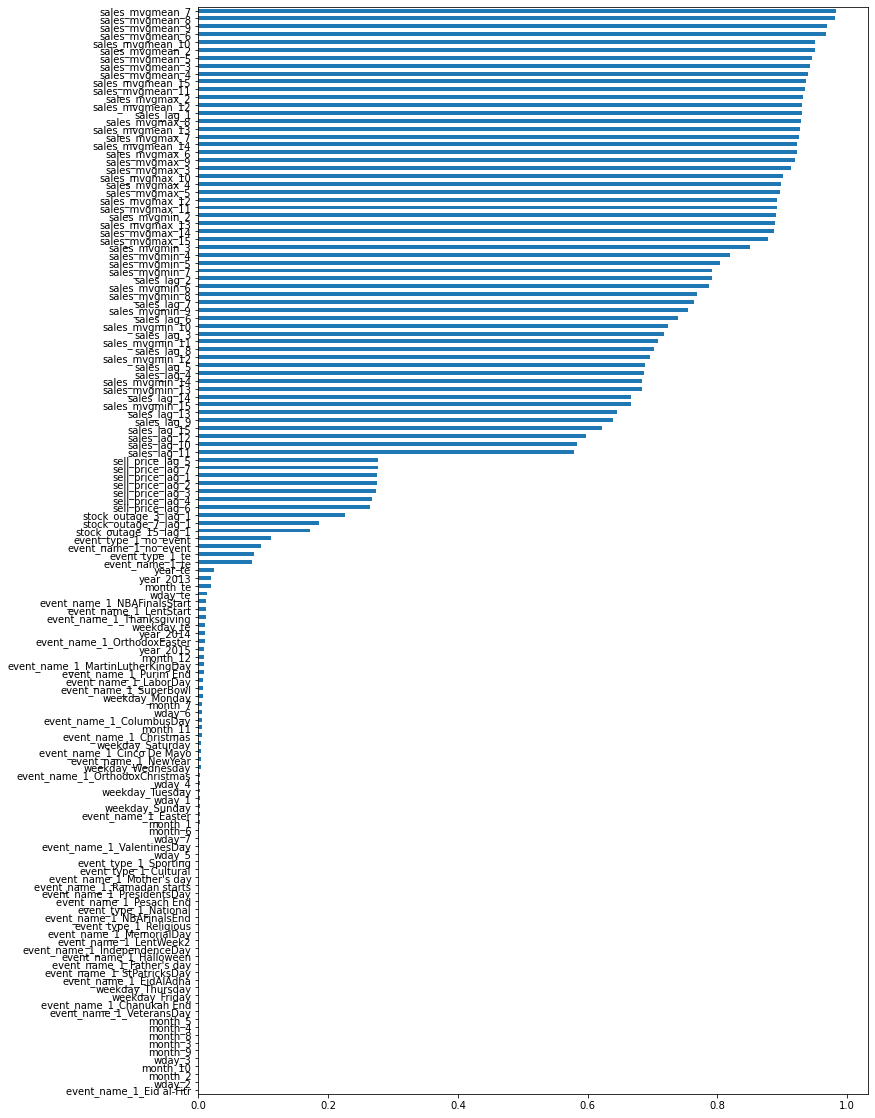

In [36]:
mutual_selector = mutual_info_classif(x,y)
ranking_mi(mutual_selector, mode="plot");

In [42]:
# It is a bit difficult to check the names on the plot, so let's see the variable names
ranking_mi(mutual_selector, mode="table")["variable"].to_list()

['sales_mvgmean_7',
 'sales_mvgmean_8',
 'sales_mvgmean_9',
 'sales_mvgmean_6',
 'sales_mvgmean_10',
 'sales_mvgmean_2',
 'sales_mvgmean_5',
 'sales_mvgmean_3',
 'sales_mvgmean_4',
 'sales_mvgmean_15',
 'sales_mvgmean_11',
 'sales_mvgmax_2',
 'sales_mvgmean_12',
 'sales_lag_1',
 'sales_mvgmax_8',
 'sales_mvgmean_13',
 'sales_mvgmax_7',
 'sales_mvgmean_14',
 'sales_mvgmax_6',
 'sales_mvgmax_9',
 'sales_mvgmax_3',
 'sales_mvgmax_10',
 'sales_mvgmax_4',
 'sales_mvgmax_5',
 'sales_mvgmax_12',
 'sales_mvgmax_11',
 'sales_mvgmin_2',
 'sales_mvgmax_13',
 'sales_mvgmax_14',
 'sales_mvgmax_15',
 'sales_mvgmin_3',
 'sales_mvgmin_4',
 'sales_mvgmin_5',
 'sales_mvgmin_7',
 'sales_lag_2',
 'sales_mvgmin_6',
 'sales_mvgmin_8',
 'sales_lag_7',
 'sales_mvgmin_9',
 'sales_lag_6',
 'sales_mvgmin_10',
 'sales_lag_3',
 'sales_mvgmin_11',
 'sales_lag_8',
 'sales_mvgmin_12',
 'sales_lag_5',
 'sales_lag_4',
 'sales_mvgmin_14',
 'sales_mvgmin_13',
 'sales_lag_14',
 'sales_mvgmin_15',
 'sales_lag_13',
 'sales_

#### Choose how many variable we want in.

In [48]:
n_variables = 71

#### Take the name of the variables we want to be selected.

In [50]:
variables_mi = ranking_mi(mutual_selector).iloc[0:n_variables]["variable"]
variables_mi

115          sales_mvgmean_7
116          sales_mvgmean_8
117          sales_mvgmean_9
114          sales_mvgmean_6
118         sales_mvgmean_10
               ...          
80     stock_outage_15_lag_1
64     event_type_1_no_event
59     event_name_1_no_event
70           event_type_1_te
69           event_name_1_te
Name: variable, Length: 71, dtype: object

#### Create a dataframe with the selected variables.

In [52]:
x_mi = x[variables_mi].copy()

### Recursive Feature Elimination